In [8]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None 

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) 

Populating the interactive namespace from numpy and matplotlib


In [9]:
# read in data
df = pd.read_csv('data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [10]:
# remove any leap day information
df = df[(df['Date'] != '2004-02-29')]
df = df[(df['Date'] != '2008-02-29')]
df = df[(df['Date'] != '2012-02-29')]

In [11]:
# split data into min and max
df_max = df[df['Element'] == 'TMAX']
df_min = df[df['Element'] == 'TMIN']

# sort by date
df_mins = df_min.sort_values(by='Date')
df_maxs = df_max.sort_values(by='Date')

# drop unnecessary columns
df_mins.drop(['ID', 'Element'], axis=1, inplace=True)
df_maxs.drop(['ID', 'Element'], axis=1, inplace=True)

# convert Date into datetime data type
df_mins['Date'] = pd.to_datetime(df_mins['Date'])
df_maxs['Date'] = pd.to_datetime(df_maxs['Date'])

# index on date
df_mins.set_index('Date', inplace=True)
df_maxs.set_index('Date', inplace=True)

## Create 2005-2014 data set

In [12]:
rng_mins = df_mins[(df_mins.index > '2005-01-01') & (df_mins.index <= '2014-12-30')]
rng_maxs = df_maxs[(df_maxs.index > '2005-01-01') & (df_maxs.index <= '2014-12-30')]

mint = rng_mins.groupby([rng_mins.index.dayofyear]).min()
mint.columns = ['Min Temp']

maxt = rng_maxs.groupby([rng_maxs.index.dayofyear]).max()
maxt.columns = ['Max Temp']

mxt = pd.concat([mint, maxt['Max Temp']], axis=1)

# mint['Min Temp'].values
# maxt['Max Temp'].values

## Create 2015 data set

In [23]:
def is_smaller(x, n):
    if x['Data_Value'] < n.loc[x['Day']]['Min Temp']:
#         print 'Day {}: is_smaller {} < {}'.format(x['Day'], x['Data_Value'], n.loc[x['Day']]['Min Temp'])
        return True
    else:
        return False

def is_bigger(x, n):    
    if x['Data_Value'] > n.loc[x['Day']]['Max Temp']:
#         print 'Day {}: is_bigger {} > {}'.format(x['Day'], x['Data_Value'], n.loc[x['Day']]['Max Temp'])
        return True
    else:
        return False

# get all of the data for 2015
start_date = '2015-01-01'
end_date = '2015-12-30'
extra_mins = df_mins[(df_mins.index > start_date) & (df_mins.index <= end_date)]
extra_maxs = df_maxs[(df_maxs.index > start_date) & (df_maxs.index <= end_date)]

# get all of the days where the temperature was lower
extra_mins.reset_index(level=0, inplace=True)
extra_mins['Day'] = extra_mins['Date'].apply(lambda x: x.dayofyear)
extra_mins = extra_mins.drop(['Date'], axis=1)
smaller_map = extra_mins.apply(is_smaller, n=mint, axis=1)
smaller = extra_mins[smaller_map]
smaller.columns = ['Min Temp', 'Day']

# get all of the days where the temperature was higher
extra_maxs.reset_index(level=0, inplace=True)
extra_maxs['Day'] = extra_maxs['Date'].apply(lambda x: x.dayofyear)
extra_maxs = extra_maxs.drop(['Date'], axis=1)
bigger_map = extra_maxs.apply(is_bigger, n=maxt, axis=1)
bigger = extra_maxs[bigger_map]
bigger.columns = ['Max Temp', 'Day']


In [16]:
from calendar import monthrange

x_rng = [1]
for i in range(1, 13):
    _, days = monthrange(2014, i)
    value = days
    if i > 1:
        value = x_rng[i-1] + days
    x_rng.append(value)

x_mth = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

print('month ranges {}'.format(x_rng))

x_pos = []
for i in range(12):
    x_pos.append((x_rng[i] + x_rng[i+1])/2)
    
print('month positions {}'.format(x_pos))    

month ranges [1, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
month positions [16, 45, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349]


In [17]:
from matplotlib.ticker import FuncFormatter

def degrees(x, pos):
    return "{}$^\circ$C".format(int(x/10))

formatter = FuncFormatter(degrees)

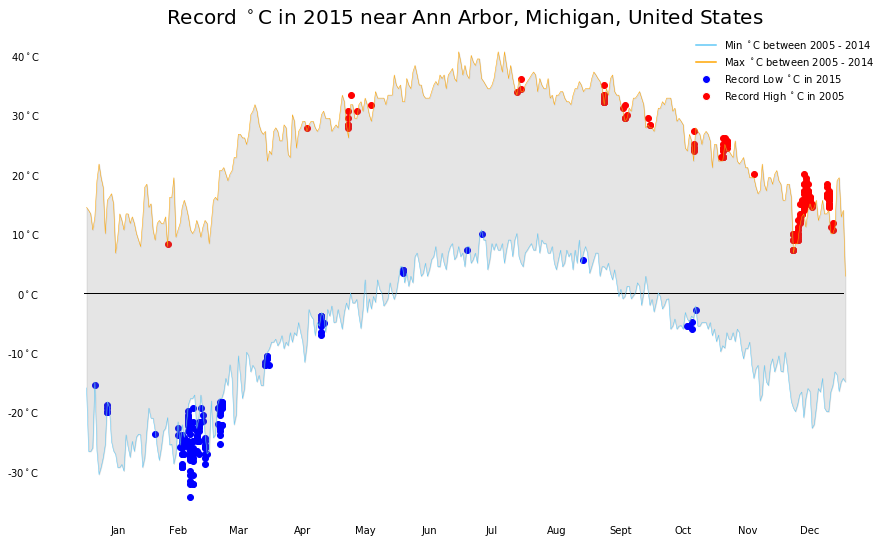

In [75]:
plt.figure()
plt.plot([0, 365], [0, 0], 'k-', lw=1)
plt.scatter(smaller['Day'], smaller['Min Temp'], color='blue')
plt.scatter(bigger['Day'], bigger['Max Temp'], color='red')
plt.plot(mxt['Min Temp'], color='#60C8F6', linewidth=0.5)
plt.plot(mxt['Max Temp'], color='orange', linewidth=0.5)
plt.fill_between(mxt.index.values, mxt['Min Temp'], mxt['Max Temp'], color='gray', alpha=0.2)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.xticks(x_pos, x_mth)
plt.title('Record $^\circ$C in 2015 near Ann Arbor, Michigan, United States', fontsize=20)

from matplotlib.lines import Line2D
from matplotlib.patches import Circle
line1 = Line2D(range(1), range(1), color='#60C8F6')
line2 = Line2D(range(1), range(1), color='orange')
circle1 = Line2D(range(1), range(1), color='white', marker='o', markersize=8, markerfacecolor='blue')
circle2 = Line2D(range(1), range(1), color='white', marker='o', markersize=8, markerfacecolor='red')
plt.legend([line1, line2, circle1, circle2], 
           ['Min $^\circ$C between 2005 - 2014', 
            'Max $^\circ$C between 2005 - 2014', 
            'Record Low $^\circ$C in 2015', 
            'Record High $^\circ$C in 2005'], frameon=False, loc=1)

plt.gca().yaxis.set_major_formatter(formatter)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()